In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
reviews=[]
ratings = []
dataframe = pd.DataFrame()
dataframe['Review'] = 0
for i in range(2,24):    
    url = 'https://www.flipkart.com/redmibook-pro-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-thin-light-laptop/product-reviews/itmcf5d0bf3be2d5?pid=COMG4Z359A4Z3MFG&lid=LSTCOMG4Z359A4Z3MFGOJQLGB&marketplace=FLIPKART&page={}'.format(i)
    res = requests.get(url)
    soup=BeautifulSoup(res.content,'html.parser')
    scraped_review=soup.find_all('div', class_="t-ZTKy" )
    scraped_rating=soup.find_all('div', class_="_3LWZlK _1BLPMq" )
    for j in scraped_review:
        review=j.get_text().replace('\n','') # replacing newline
        review=review.strip(' ') # to remove all white spaces, tabs and newline
        reviews.append(review)
        dataframe.loc[len(dataframe.index)] = review

In [3]:
dataframe

,Review
0,Amazing👍😍🤩A great machine Unbleavable performa...
1,No dual boot. My coder career is at the verge ...
2,Worth the priceREAD MORE
3,"BEST LAPTOP I BOUGHT,SHOULD TRYREAD MORE"
4,Excluding backlit keyboard everything is goodR...
5,Display quality is very poor and performance i...
6,Compared to money it's great. I bought at 35k....
7,Great value for money!! All other brads are ch...
8,Battery backup is so poor and display qualty i...
9,Total Waste of money. After use of 1 month aud...


In [4]:
for i in range(len(dataframe['Review'])):
    dataframe['Review'][i] = dataframe['Review'][i].strip()

In [5]:
dataframe

,Review
0,Amazing👍😍🤩A great machine Unbleavable performa...
1,No dual boot. My coder career is at the verge ...
2,Worth the priceREAD MORE
3,"BEST LAPTOP I BOUGHT,SHOULD TRYREAD MORE"
4,Excluding backlit keyboard everything is goodR...
5,Display quality is very poor and performance i...
6,Compared to money it's great. I bought at 35k....
7,Great value for money!! All other brads are ch...
8,Battery backup is so poor and display qualty i...
9,Total Waste of money. After use of 1 month aud...


In [6]:
##Parts of speech tagging
all_reviews = []
for i in range(len(dataframe['Review'])):
    all_reviews.append(dataframe['Review'][i])
print(all_reviews)

['Amazing👍😍🤩A great machine Unbleavable performanceREAD MORE', 'No dual boot. My coder career is at the verge of dyingREAD MORE', 'Worth the priceREAD MORE', 'BEST LAPTOP I BOUGHT,SHOULD TRYREAD MORE', 'Excluding backlit keyboard everything is goodREAD MORE', "Display quality is very poor and performance is not satisfactory when this is i5 11 gen .. please don't buy this...it's my personal review after use of 3 month.. don't read other positive reviews..READ MORE", "Compared to money it's great. I bought at 35k. It has all what you expect from other brands like Dell.Just as other reviews, I agree regarding to display. Other than that performance wise it's great. It's been 6 months nowREAD MORE", 'Great value for money!! All other brads are charging way more higher! Display is ok ok but overall super good..READ MORE', 'Battery backup is so poor and display qualty is not good otherwise all goodREAD MORE', "Total Waste of money. After use of 1 month audio is not working. display is very b

In [7]:
all_reviews = ' '.join(all_reviews)
all_reviews

"Amazing👍😍🤩A great machine Unbleavable performanceREAD MORE No dual boot. My coder career is at the verge of dyingREAD MORE Worth the priceREAD MORE BEST LAPTOP I BOUGHT,SHOULD TRYREAD MORE Excluding backlit keyboard everything is goodREAD MORE Display quality is very poor and performance is not satisfactory when this is i5 11 gen .. please don't buy this...it's my personal review after use of 3 month.. don't read other positive reviews..READ MORE Compared to money it's great. I bought at 35k. It has all what you expect from other brands like Dell.Just as other reviews, I agree regarding to display. Other than that performance wise it's great. It's been 6 months nowREAD MORE Great value for money!! All other brads are charging way more higher! Display is ok ok but overall super good..READ MORE Battery backup is so poor and display qualty is not good otherwise all goodREAD MORE Total Waste of money. After use of 1 month audio is not working. display is very bad. Heating issue. Don't was

In [8]:
import re
for i in range(len(dataframe['Review'])):
    dataframe['Review'][i] = re.sub('READ MORE','',dataframe['Review'][i])
    dataframe['Review'][i] = re.sub('OverallDisplay 3/5Battery 4/5Performance 5/5Connectivity 5/5Sound quality 5/5Keyboard 4/5','',dataframe['Review'][i])

In [9]:
dataframe

,Review
0,Amazing👍😍🤩A great machine Unbleavable performance
1,No dual boot. My coder career is at the verge ...
2,Worth the price
3,"BEST LAPTOP I BOUGHT,SHOULD TRY"
4,Excluding backlit keyboard everything is good
5,Display quality is very poor and performance i...
6,Compared to money it's great. I bought at 35k....
7,Great value for money!! All other brads are ch...
8,Battery backup is so poor and display qualty i...
9,Total Waste of money. After use of 1 month aud...


In [10]:
dataframe.isna().sum()

Review    0
dtype: int64

In [11]:
nlp = spacy.load('en_core_web_sm')
review_1 = nlp(all_reviews)
spacy.displacy.render(review_1, style='ent', jupyter=True)

In [12]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in review_1 if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['verge', 'BEST', 'LAPTOP', 'TRYREAD', 'Excluding', 'keyboard', 'Display', 'quality', 'performance', 'buy', 'review', 'use', 'month', 'read', 'reviews', 'READ', 'Compared', 'money', 'bought', '35k']


In [13]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,laptop,10
1,read,8
2,display,6
3,performance,6
4,battery,5
5,buy,4
6,money,3
7,quality,2
8,use,2
9,month,2


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

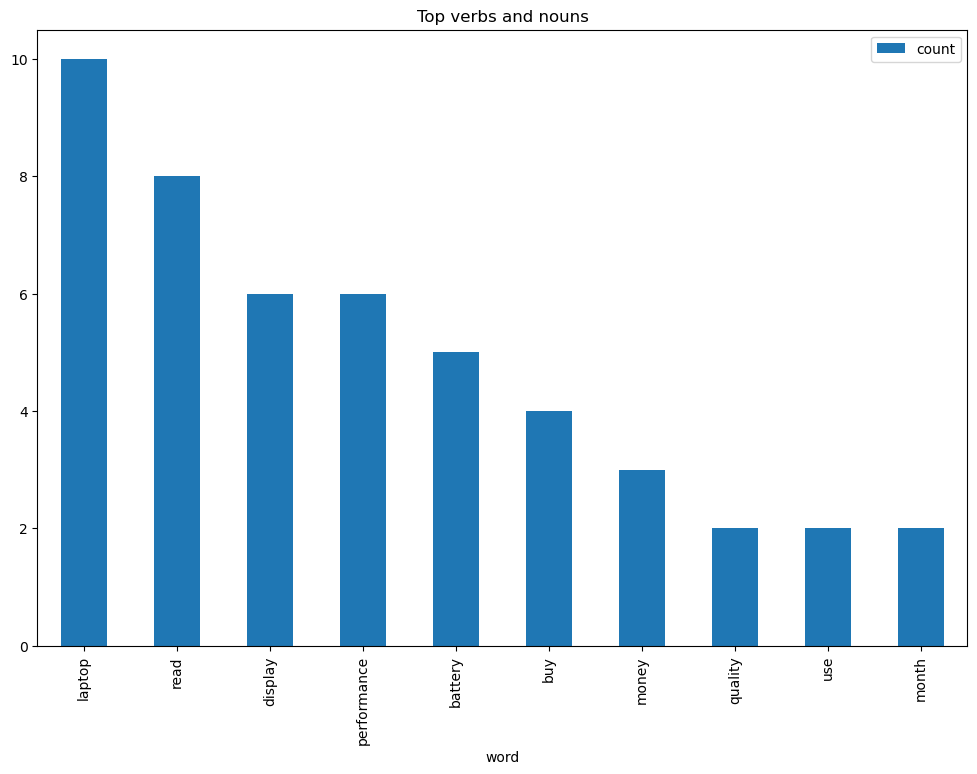

In [14]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [17]:
#Sentiment analysis
afinn = pd.read_csv("C:/Users/DELL/Downloads/assignment/text mining/Afinn (1).csv", sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [18]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [19]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize("".join(all_reviews))
sentences[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["It's been 6 months nowREAD MORE Great value for money!!",
 'All other brads are charging way more higher!',
 'Display is ok ok but overall super good..READ MORE Battery backup is so poor and display qualty is not good otherwise all goodREAD MORE Total Waste of money.',
 'After use of 1 month audio is not working.',
 'display is very bad.',
 'Heating issue.',
 "Don't waste your moneyREAD MORE Excellent laptop.",
 "I u want to buy it don't hesitate u will definitely love itREAD MORE worst product don't buy  it mine laptop tochpad not working i have used only for 2 weeksREAD MORE Performance is Excellent, but battery backup is 5 hrs of average.",
 'Display is dull and shaggy not crystal clear what ever the settings.READ MORE Poor battery performance ( even in battery saver).Return policy not applicable for battery issues.Other aspects laptop is good.READ MORE Terrible Experience!After using only 3 days, Screen is getting black, pic and letters flicker, camera quality poorest.READ MORE A

In [20]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Amazing👍😍🤩A great machine Unbleavable performa...
1,My coder career is at the verge of dyingREAD M...
2,I bought at 35k.
3,It has all what you expect from other brands l...
4,Other than that performance wise it's great.
5,It's been 6 months nowREAD MORE Great value fo...
6,All other brads are charging way more higher!
7,Display is ok ok but overall super good..READ ...
8,After use of 1 month audio is not working.
9,display is very bad.


In [21]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [22]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [23]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1    67
2     4
3    19
4     7
5    10
6     8
7    28
8     9
9     4
Name: word_count, dtype: int64

In [24]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [25]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1    67
2     4
3    19
4     7
5    10
6     8
7    28
8     9
9     4
Name: word_count, dtype: int64

In [26]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,word_count,sentiment_value
10,Heating issue.,2,0
15,!READ MORE,2,0
12,I u want to buy it don't hesitate u will defin...,43,2
3,It has all what you expect from other brands l...,19,3
4,Other than that performance wise it's great.,7,3
5,It's been 6 months nowREAD MORE Great value fo...,10,3
0,Amazing👍😍🤩A great machine Unbleavable performa...,9,6
7,Display is ok ok but overall super good..READ ...,28,7
1,My coder career is at the verge of dyingREAD M...,67,8
14,The only absence is usb c and pd charging.READ...,65,9


In [27]:
sent_df[sent_df['sentiment_value'] <= 0]

,sentence,word_count,sentiment_value
2,I bought at 35k.,4,0
6,All other brads are charging way more higher!,8,0
8,After use of 1 month audio is not working.,9,0
9,display is very bad.,4,-3
10,Heating issue.,2,0
11,Don't waste your moneyREAD MORE Excellent laptop.,7,-1
13,Display is dull and shaggy not crystal clear w...,61,-2
15,!READ MORE,2,0


In [28]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,word_count,sentiment_value


In [29]:
sent_df['index']=range(0,len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

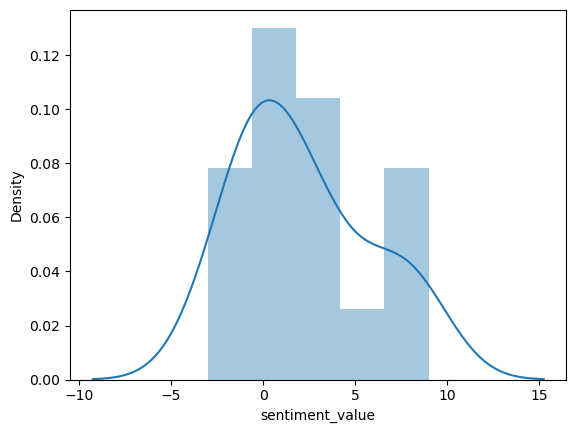

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

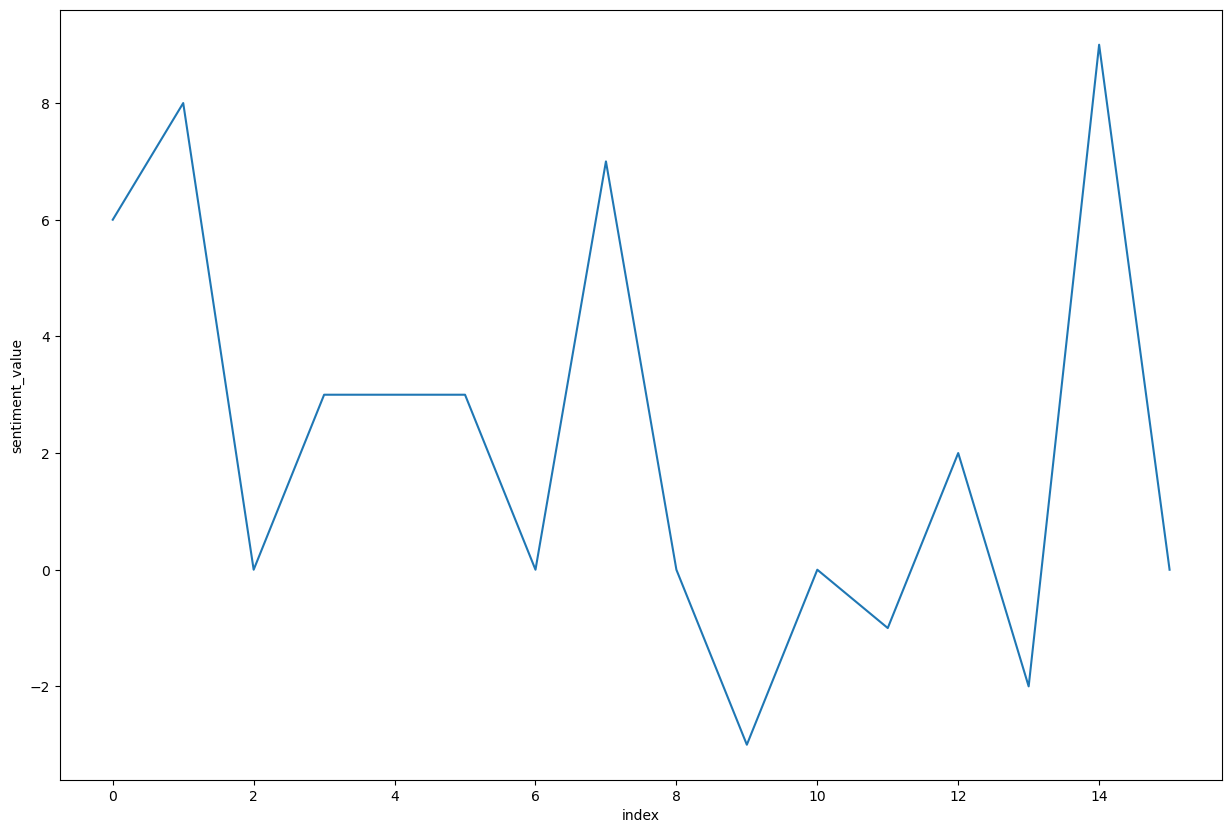

In [31]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

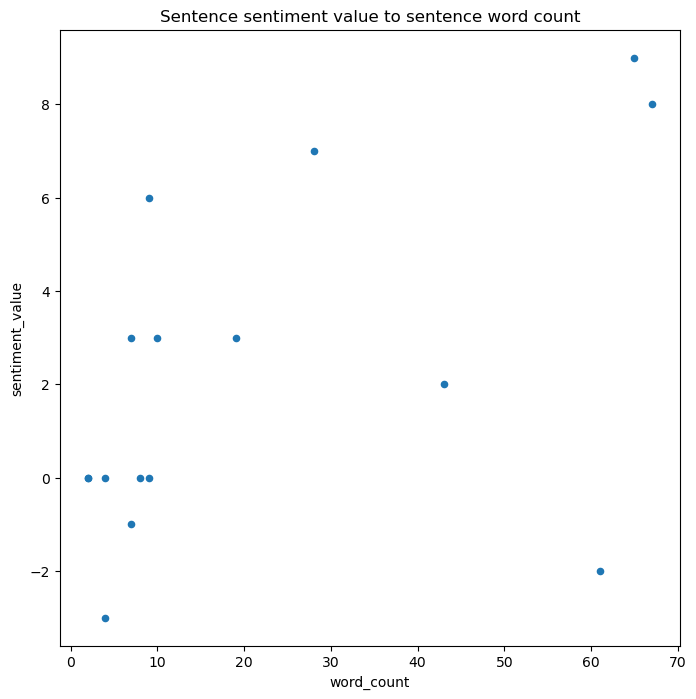

In [32]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')